`WUR Machine Learning Course - Project Assignment 3 - Version 2022`

# **Clustering with K-Means**
Clustering helps to understand how data samples are related to each other. Clusters are composed by points that are similar to each other, but relatively different to the rest of points. Clustering methods do not need data labels and therefore are called *unsupervised*, as opposed to supervised ones that we discussed in the previous exercises. In datasets where no labels are available, finding clusters of data points can help grouping the data samples in a principled way.

# **Instructions**
In this exercise you will code the k-means algorithm by prototyping on a synthetic dataset, and then use it to find clusters of world cities based on some of their statistics. You will then analyze the clusters to characterize the different types of cities based on their clustering.

# **Environment set-up**

In [22]:
## Importing tabular data
import pandas as pd

## Plotting and visualization
from matplotlib import pyplot as plt

import numpy as np
import random
from sklearn.metrics.pairwise import pairwise_distances
import os

# **Importing files to Colab**

Run the cell below and check if there is a new folder created on colab with the name `data` containing several `.csv` files with data.

In [23]:
! git clone https://gist.github.com/dmarcosg/d01e120a4e33d4c11de30091259ed51e data

fatal: destination path 'data' already exists and is not an empty directory.


Now we can load `data2d.csv`, which contains 200 data points and 2 variables.

In [6]:
data2d = pd.read_csv('data/data2d.csv',header=None)

## Convert toy 2D data from pandas to numpy array
data2d = np.array(data2d)

# **K-Means implementation and toy 2D data**

We have seen how k-means works during the lectures. First use one or more code cells to experiment with the different operations you will need:


*   Initialize the cluster centroids using `K` randomly selected data points. One way to do this is by using the `random.sample()` function.
*   Compute the distance between each data point and each cluster centroid. This can be efficiently done by using the `pairwise_distances` function included in the `sklearn` package.
*   Find the nearest cluster centroid for each data point. One way is to use the `numpy` function `argmin()`.
*   Update each cluster centroid by computing the mean of all data points assigned to it.





### **Let's start by taking a look at the data**

Text(0, 0.5, 'Variable 1')

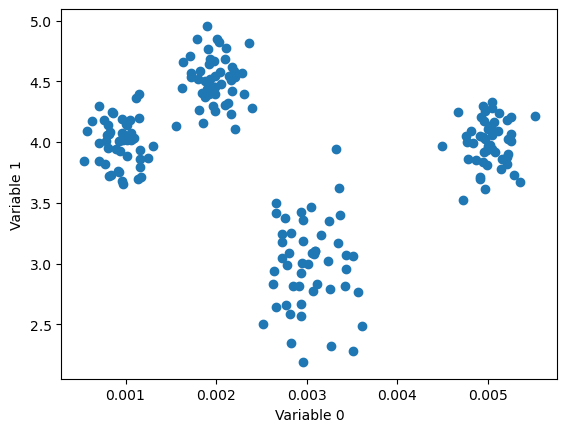

In [52]:
## Visualize the 2D data

plt.scatter(data2d[:,0],data2d[:,1])
plt.xlabel('Variable 0')
plt.ylabel('Variable 1')

In [53]:
seed = 123
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

**``Action 1``**

`` Initialize the cluster centroids``

In [50]:
K = 4

## TODO: Choose K data points as initial cluster centroids
random_indeces = random.sample(range(K),K)
cluster_centroids = [np.random.rand(K)*(np.max(data2d[:,0]) - np.min(data2d[:,0])) + np.min(data2d[:,0]), np.random.rand(K)*(np.max(data2d[:,1]) - np.min(data2d[:,1])) + np.min(data2d[:,1])]

**``Question 1``**

`` Why do we randomly select existing data points for the initialization, instead of just assigning random values?``

**``Action 2``**

`` Compute distance between all data points and all centroids (which should result in a matrix of distances of shape [N,K], with N the number of data points and K the number of clusters) and get the closest centroid to each data point (which should result in a vector of shape [N] where each entry is an integer between 0 and K-1).``

In [ ]:
## TODO: Compute distance between all data points and all centroids
distances = ...

## TODO: Get the closest centroid to each data point
cluster_assignments = ...

In [ ]:
## Plot the cluster assignments with this code
for i in range(K):
    plt.scatter(data2d[cluster_assignments==i,0],data2d[cluster_assignments==i,1])
    plt.xlabel('Variable 0')
    plt.ylabel('Variable 1')
plt.show()

**``Question 2``**

`` If you haven't used any data normalization, you might find surprising the centroid assignment. Why do you think is that?``

**``Action 3``**

`` Go back to Actions 1 and 2 but, this time, normalize the data such that both variables have a similar range.``

**``Question 3``**

`` What effect does the normalization have in the cluster assignment?``

**``Action 4``**

`` Fill in the next code cell to implement the cluster centroid update.``

In [ ]:
## TODO: Update the centroids
for i in range(K):
    cluster_centroids[i,:] = ...

**``Question 4``**

`` What happens to the cluster centroids after you update them?``

**``Action 5``**

`` Fill in the following function definition to create your own K-Means function.``

In [ ]:
def my_kmeans(data,K=4,maxiter=10,do_plot=False):
    ## TODO: Choose K data points as initial cluster centroids

    ## Loop over iterations
    for iter in range(maxiter):
        ## TODO: Compute distance between all data points and all centroids

        ## TODO: Get the closest centroid to each data point

        ## TODO: Update the centroids

        ## Optionally, plot the data and assignments. Only for 2D data.
        if do_plot:
            for i in range(K):
                plt.scatter(data[cluster_assignments==i,0],data[cluster_assignments==i,1])
                plt.xlabel('Variable 0')
                plt.ylabel('Variable 1')
                plt.show()
    return cluster_assignments, cluster_centroids

In [ ]:
## Run your implemented kmeans function on the 2D data
my_kmeans(data2d,do_plot=True)

**``Question 5``**

`` What happens to the cluster centroids as the iterations progress? When do they stop changing?``

# **Exploring some real data about cities**

This dataset containts several features concerning urban areas in OECD countries. Start by running the following code cell and taking a look at the loaded variables. `data_cities` contains the eight variables, `feature_names` contains the names of the variables and `regions` contains the name of the geographic region where each city is located.

In [ ]:
## Read the .csv files
country_regions = pd.read_csv('data/country_codes.csv')
oecd_cities_stats = pd.read_csv('data/oecd_cities_stats.csv')

## Extract the variables and their names
data_cities = np.array(oecd_cities_stats.iloc[1:,1:],dtype=np.float32)
number_of_variables = data_cities.shape[1]
feature_names = list(oecd_cities_stats.columns.values[1:])

## Extract the country codes and region name of each city
country_codes = []
regions = []
for name in oecd_cities_stats['Metropolitan areas'][1:]:
  country_codes.append(name[0:2])
  regions.append(country_regions[name[0:2]][1])
regions = np.array(regions)
country_codes = np.array(country_codes)

**``Action 6``**

``Run K-Means clustering on data_cities.``

In [ ]:
## TODO: Run K-Means clustering on data_cities
K = 4
# Normalize data_cities if needed
cluster_assignments, cluster_centroids = my_kmeans(data_cities,K=K)

**``Question 6``**

``Do you think it is important to normalize the data also in this case?``

**``Action 7``**

``Use the provided code to visualize each centroid.``

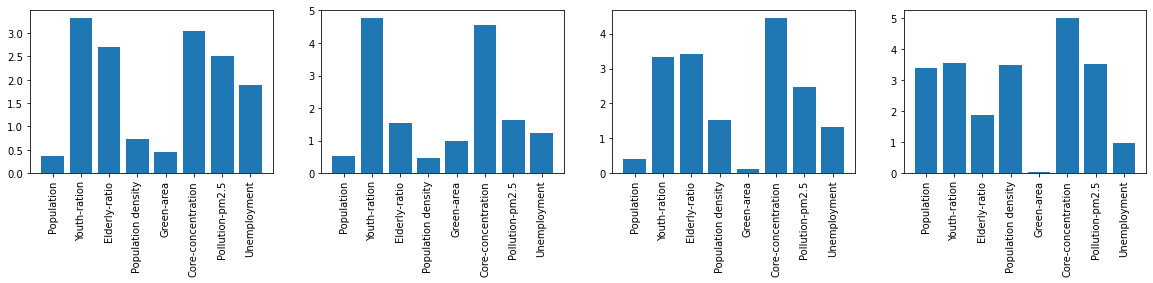

In [ ]:
fig, ax = plt.subplots(1,K,figsize=(5*K, 3))
for i in range(K):
  ax[i].bar(np.arange(number_of_variables),cluster_centroids[i,:])
  ax[i].set_xticks(np.arange(number_of_variables))
  ax[i].set_xticklabels(feature_names,rotation = 90)

**``Question 7``**

``What are the main characteristics of each cluster?``

**``Action 8``**

``It would also be informative to know which regions are associated with each cluster. Starting with the previous code cell, plot pie charts displaying the proportions of each region per cluster. For this, you will find the numpy function unique() very useful. Take a look at the documentation to make sure that it returns both the unique regions present and the counts. For the pie charts, matplotlib has a plt.pie() function that will do the job.``

In [ ]:
## TODO: Plot region proportions per cluster

**``Question 8``**

``Discuss some characteristics of each region by looking at both the bar plots and the pie charts.``